# Convert OpenSN data to name,host,type,x,y,z,t,lum

Data downloaded from The Open Supernova Catalog https://sne.space on Aug. 20, 2019

In [0]:
import pandas as pd
import numpy as np
from astropy import units
from astropy.coordinates import SkyCoord
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('The Open Supernova Catalog.csv')
# Select SNe that have position and time data
# 37372 including NaN distance, otherwise 19204 SNe
df = df.loc[(df['R.A.'].notnull()) & \
              (df['Dec.'].notnull()) & \
              (df['dL (Mpc)'].notnull()) & \
              (df['Type'].notnull()) & \
              (df['Disc. Date'].notnull())]
print(len(df))
df

19204


,Name,Disc. Date,Mmax,Host Name,R.A.,Dec.,dL (Mpc),Type
0,SN185A,185/12/07,-16.0000,Milky Way,"14:43:00,14:35:55,14:43:30.000","-62:30,-60:36,-62:28:00.00",0.00250,Ia
2,SN393A,393/02/27,-11.0000,Milky Way,17:13:50.000,-39:25:00.00,0.00100,CC
4,SN1006A,1006/04/17,-12.4900,Milky Way,"15:02:50,15:02:22.4","-41:56,-42:06:09.0",0.00218,Ia
5,SN1054A,1054/07/04,-15.4000,Milky Way,"05:34:31,05:34:31.889,05:34:32.0","+22:01,+22:00:51.98,+22:00:52.0",0.00190,CC
7,SN1572A,1572/11/06,-16.2000,Milky Way,"00:25:21.5,00:25:18,00:24:48.600,00:25:14.0","+64:08:27,+64:09,+64:08:48.98,+64:08:39.0",0.00275,I
...,...,...,...,...,...,...,...,...
50410,AT2019ujl,2019/11/07,-20.3700,NaN,09:44:59.677,+33:41:10.42,1546.00000,Candidate
50420,AT2019ukr,2019/11/08,-19.5450,NaN,21:51:56.555,-26:24:30.40,566.52000,Candidate
50434,AT2019ulp,2019/11/09,-17.1486,UGC 4431,08:28:13.100,+00:01:29.63,136.83200,Candidate
50435,AT2019ulo,2019/11/09,-16.9600,NaN,08:53:06.709,-06:19:46.85,253.28900,Candidate


I will have to iterate through the rows, since some coords have multiple entries, and some dates are bad

In [36]:
countII = 0
countIa = 0
countI = 0
countC = 0
countOther = 0
for index, row in df.iterrows():
    if "II" in row["Type"]:
      countII = countII + 1
    elif "Ia" in row["Type"]:
      countIa = countIa + 1
    elif "I" in row["Type"]:
      countI = countI + 1
    elif "Candidate" in row["Type"]:
      countC = countC + 1
    else:
      countOther = countOther + 1
print("II: ", countII)
print("Ia: " , countIa)
print("I: " , countI)
print("Candidate: " , countC)
print("Other: " , countOther)


II:  3967
Ia:  11792
I:  1163
Candidate:  1879
Other:  403


In [38]:
x = []
y = []
z = []
t = []

log10lum = []
name = []
host = []
tpe = []

#for datetime
fmt = '%Y/%m/%d'

N = 1e10
for index, row in df.iterrows():
    bad = False
    badType = False
    #there are still some dates that cause errors (e.g., 185/12/07/)
    date = str(row['Disc. Date'])
    pos = date.find(',')
    fmt0 = fmt
    if (pos != -1):    
        date = row['Disc. Date'][0:pos]
    pos1 = date.find('/')
    pos2 = date.rfind('/')
    if (pos1 == -1):
        fmt0 = '%Y'
    if (pos1 != -1 and pos2 == pos1):
        fmt0 = '%Y/%m'
    if (fmt0 == fmt):
        val1 = int(date[0:pos1])
        if (val1 <= 12):
            fmt0 = '%m/%d/%Y'
        if (val1 > 12 and val1 < 1800):
            bad = True
    # Check for type and enter clean version
    if "I" not in row["Type"]:
      badType = True
    if (not bad) and (not badType):
        if "II" in row["Type"]:
          tpe.append("II")
        elif "Ia" in row["Type"]:
          tpe.append("Ia")
        elif "I" in row["Type"]:
          tpe.append("I")
        else:
          print("error?..." + row["Type"])
          tpe.append(row["Type"])
        
        dt = datetime.datetime.strptime(date, fmt0) 
        t.append(dt.year + dt.month/12. + dt.day/365.24)
        
        ra = row['R.A.']
        pos = str(ra).find(',')
        if (pos != -1):    
            ra = row['R.A.'][0:pos]

        dec = row['Dec.']
        pos = str(dec).find(',')
        if (pos != -1):    
            dec = row['Dec.'][0:pos]

        d = row['dL (Mpc)']*units.Mpc

        c1 = SkyCoord(ra, dec, unit=(units.hourangle, units.deg), distance=d).galactic.cartesian
        x.append(c1.x.to(units.Mpc).value)
        y.append(c1.y.to(units.Mpc).value)
        z.append(c1.z.to(units.Mpc).value)

        log10lum.append(0.4*(4.74 - row['Mmax']))

        name.append(row['Name'])
        host.append(row['Host Name'])
        
        
    if (index > N):
        break

print("done")

done


1885.7132114043734 2019.930356295404
['I', 'Ia', 'I', 'I', 'II', 'II', 'I', 'II', 'II', 'I', 'II', 'II', 'II', 'II', 'Ia', 'Ia', 'I', 'II', 'I', 'Ia', 'I', 'I', 'II', 'II', 'II', 'I', 'II', 'II', 'I', 'II', 'II', 'II', 'I', 'II', 'I', 'Ia', 'II', 'II', 'I', 'Ia', 'Ia', 'Ia', 'I', 'II', 'Ia', 'Ia', 'Ia', 'I', 'I', 'I', 'I', 'Ia', 'I', 'I', 'II', 'Ia', 'II', 'II', 'Ia', 'II', 'II', 'I', 'Ia', 'Ia', 'II', 'Ia', 'I', 'I', 'II', 'II', 'I', 'I', 'Ia', 'I', 'I', 'Ia', 'Ia', 'I', 'I', 'I', 'II', 'I', 'Ia', 'II', 'I', 'I', 'Ia', 'II', 'II', 'I', 'I', 'II', 'Ia', 'II', 'II', 'I', 'II', 'II', 'I', 'I', 'Ia', 'Ia', 'Ia', 'II', 'I', 'II', 'II', 'Ia', 'Ia', 'I', 'I', 'Ia', 'II', 'II', 'Ia', 'I', 'II', 'II', 'II', 'Ia', 'I', 'Ia', 'Ia', 'II', 'Ia', 'I', 'II', 'Ia', 'Ia', 'I', 'Ia', 'I', 'II', 'I', 'Ia', 'II', 'II', 'II', 'Ia', 'Ia', 'Ia', 'Ia', 'Ia', 'Ia', 'Ia', 'I', 'II', 'II', 'I', 'Ia', 'II', 'Ia', 'I', 'Ia', 'I', 'I', 'II', 'II', 'II', 'II', 'I', 'Ia', 'II', 'II', 'I', 'Ia', 'II', 'II', 'I', 'I',

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


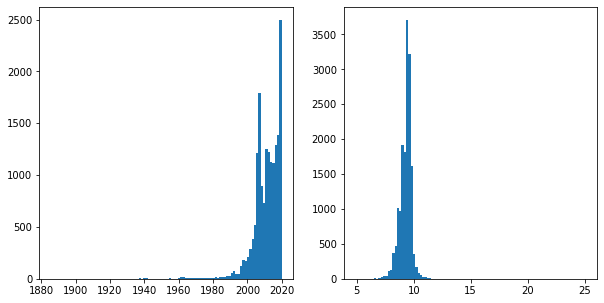

In [39]:
print(min(t), max(t))
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
_ = ax1.hist(t,bins=100)
_ = ax2.hist(log10lum,bins=100)
print(tpe)
distances = np.sqrt(np.array(x)**2. + np.array(y)**2. + np.array(z)**2.)
print(max(x))
print(max(y))
print(max(z))
print(max(distances))

### Write this to a new csv file

In [40]:
print(len(name), len(host), len(tpe), len(x), len(y), len(z), len(t))
data = {'name':np.array(name),
        'host':np.array(host),
        'type':np.array(tpe),
        'x':np.array(x),
        'y':np.array(y),
        'z':np.array(z),
        't':np.array(t),
        'log10lum':np.array(log10lum)}
pd.DataFrame(data).to_csv('OpenSNCatConverted.csv', index=False)

16918 16918 16918 16918 16918 16918 16918
